
### Data Analytics III

1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [2]:
np.random.seed(0)
sns.set()

In [3]:
!wget https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

--2022-04-12 14:47:15--  https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3975 (3.9K) [text/plain]
Saving to: ‘iris.csv.1’

iris.csv.1          100%[===================>]   3.88K  --.-KB/s    in 0.001s  

2022-04-12 14:47:15 (2.94 MB/s) - ‘iris.csv.1’ saved [3975/3975]



# Loading the dataset

In [4]:
df = pd.read_csv('./iris.csv')

In [5]:
df.shape

(150, 5)

In [6]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [9]:
le = LabelEncoder()
le.fit(["Setosa", "Versicolor", "Virginica"])

LabelEncoder()

In [10]:
variety = df['variety']
variety = le.transform(variety)

In [11]:
df['variety'] = variety

In [12]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Splitting into Train and Test data

In [13]:
X, Y = df.drop('variety', axis='columns'), df['variety']

In [14]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int64

In [16]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, stratify=Y, random_state=0)

In [17]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((112, 4), (38, 4), (112,), (38,))

# Training the Naive Bayes Classifier

In [18]:
model = GaussianNB()

In [19]:
model.fit(X_train, Y_train)

GaussianNB()

# Evaluation

In [20]:
Y_pred = model.predict(X_val)

In [21]:
accuracy = accuracy_score(Y_val, Y_pred)

In [22]:
print("Accuracy of Naive Bayes Classfier : ", accuracy * 100)

Accuracy of Naive Bayes Classfier :  97.36842105263158


# Confusion Matrix

In [23]:
cm = confusion_matrix(Y_val, Y_pred)

In [24]:
cm

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 11]])

In [25]:
np.sum(cm, axis=1)

array([13, 13, 12])

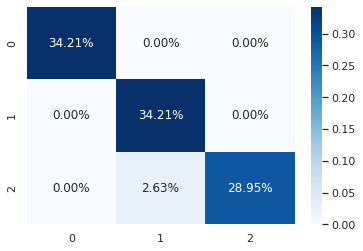

In [26]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.show()

**We need to get the TP, TN, FP, FN, Precision and Recall for each class**

In [27]:
def evaluate_metrics_for_class(cm, class_no):
    row_sums, col_sums = np.sum(cm, axis=1), np.sum(cm, axis=0)
    TP, FP, FN = cm[class_no][class_no], row_sums[class_no] - cm[class_no][class_no], col_sums[class_no] - cm[class_no][class_no]
    TN = np.sum(cm) - TP - FP - FN
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    return TP, FP, FN, TN, precision, recall

In [28]:
TP_Setosa, FP_Setosa, FN_Setosa, TN_Setosa, precision_Setosa, recall_Setosa = evaluate_metrics_for_class(cm, 0)

In [29]:
print("For Class Setosa")
print("TP : ", TP_Setosa)
print("FP : ", FP_Setosa)
print("FN : ", FN_Setosa)
print("TN : ", TN_Setosa)
print("Precision : ", precision_Setosa)
print("Recall : ", recall_Setosa)

For Class Setosa
TP :  13
FP :  0
FN :  0
TN :  25
Precision :  1.0
Recall :  1.0


In [30]:
TP_Versicolor, FP_Versicolor, FN_Versicolor, TN_Versicolor, precision_Versicolor, recall_Versicolor = evaluate_metrics_for_class(cm, 1)

In [31]:
print("For Class Versicolor")
print("TP : ", TP_Versicolor)
print("FP : ", FP_Versicolor)
print("FN : ", FN_Versicolor)
print("TN : ", TN_Versicolor)
print("Precision : ", precision_Versicolor)
print("Recall : ", recall_Versicolor)

For Class Versicolor
TP :  13
FP :  0
FN :  1
TN :  24
Precision :  1.0
Recall :  0.9285714285714286


In [32]:
TP_Virginica, FP_Virginica, FN_Virginica, TN_Virginica, precision_Virginica, recall_Virginica = evaluate_metrics_for_class(cm, 2)

In [33]:
print("For Class Virginica")
print("TP : ", TP_Virginica)
print("FP : ", FP_Virginica)
print("FN : ", FN_Virginica)
print("TN : ", TN_Virginica)
print("Precision : ", precision_Virginica)
print("Recall : ", recall_Virginica)

For Class Virginica
TP :  11
FP :  1
FN :  0
TN :  26
Precision :  0.9166666666666666
Recall :  1.0
